In [9]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from pydataset import data

### 1. Answer with the type of test you would use (assume normal distribution):

##### a. Is there a difference in grades of students on the second floor compared to grades of all students?


In [ ]:
# One sample t-test, 2 tail

##### b. Are adults who drink milk taller than adults who dont drink milk?


In [ ]:
# Two sample t-test, 1 tail

##### c. Is the the price of gas higher in texas or in new mexico?

In [ ]:
# Two sample t-test, 1 tail

##### d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# Two sample t-test, 2 tail

##### 

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

##### office_1
    - sample size = 40 sales
    - μ = 90 days
    - sd = 15 days

##### office_2
    - sample size = 50 sales
    - μ = 100 days
    - sd = 20 days
    

##### significance level = 0.05

##### H$_0$ : There is not a difference in the mean time it takes office_1 and office_2 to sell a house

##### H$_a$ : There is a difference in the mean time it takes office_1 and office_2 to sell a house

In [10]:
# confidence level = 0.95
α = 0.05

# Office_1
μ_1 = 90
sample_size_1 = 40
sd_1 = 15

# Office_2
μ_2 = 100
sample_size_2 = 50
sd_2 = 20

In [15]:
office_1_data = np.random.normal(μ_1, sd_1, sample_size_1)

office_2_data = np.random.normal(μ_2, sd_2, sample_size_2)

In [19]:
_, levene_p = stats.levene(office_1_data, office_2_data)

In [20]:
levene_p < α

True

In [ ]:
# p_val < α, we reject the null hypothesis. 
# -- We accept there is a difference in mean time 
# -- it takes office_1 and office_2 to sell a house.

##### 

### 3. Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    
    b. Are compact cars more fuel-efficient than the average car?
    
    c. Do manual cars get better gas mileage than automatic cars?

In [22]:
mpg = data('mpg')

##### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    Two sample ttest, two tail

H$_0$: There is not a difference in fuel-efficiency in cars from 2008 and 1999

H$_a$: There is a difference in fuel-efficiency in cars from 2008 and 1999

In [31]:
mpg['fuel_efficiency'] = mpg[['cty','hwy']].agg('mean', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

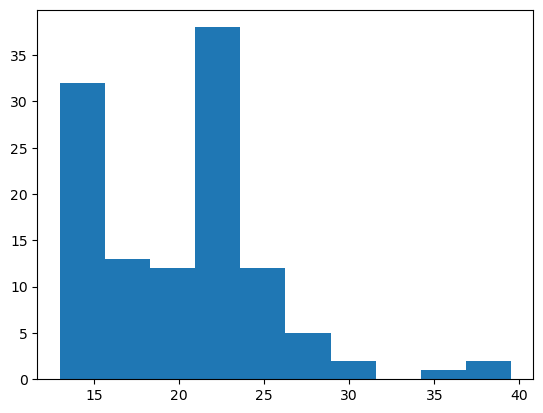

In [49]:
plt.hist(mpg[mpg.year == 1999].fuel_efficiency)
plt.show

In [57]:
μ_1999 = mpg[mpg['year'] == 1999].fuel_efficiency.mean()

μ_1999

20.22222222222222

In [56]:
μ_2008 = mpg[mpg['year'] == 2008].fuel_efficiency.mean()

μ_2008

20.076923076923077

In [61]:
fuel_1999 = mpg[mpg['year'] == 1999].fuel_efficiency

fuel_2008 = mpg[mpg['year'] == 2008].fuel_efficiency

In [73]:
_, levene_fuel = stats.levene(fuel_1999, fuel_2008)

In [70]:
α = 0.05

In [71]:
levene_fuel < α

False

In [ ]:
# levene_fuel is not less than α. 
# -- We fail to reject the null hypothesis at this time.

In [76]:
_, fuel_ttest = stats.ttest_ind(fuel_1999, fuel_2008)

In [77]:
fuel_ttest < α

False

In [ ]:
# fuel_ttest is not less than α.
# -- At this time we fail to reject the null hypothesis.
# - We conclude there is not a significant difference in 
# -- fuel-efficiency in cars from 2008 and 1999.

##### b. Are compact cars more fuel-efficient than the average car?

In [86]:
compact_car = mpg[mpg['class'] == 'compact'].fuel_efficiency

In [87]:
average_car = mpg[mpg['class'] != 'compact'].fuel_efficiency

In [92]:
_, compact_levene = stats.levene(average_car, compact_car)

In [122]:
compact_levene < (α/2)

True

In [ ]:
# compact_levene is less than α.
# We accept the null hypothesis and conclude there is
# -- sufficient evidence to support the claim "compact cars
# -- are more fuel efficient than the avg car."

##### c. Do manual cars get better gas mileage than automatic cars?

In [100]:
manual_car = mpg['manual_transmission'] = mpg.trans.str.startswith('manual')

manual_car

1      False
2       True
3       True
4      False
5      False
       ...  
230    False
231     True
232    False
233     True
234    False
Name: trans, Length: 234, dtype: bool

In [104]:
auto = mpg[mpg['manual_transmission'] == True].fuel_efficiency

manual = mpg[mpg.manual_transmission == False].fuel_efficiency


In [110]:
_, manual_levene = stats.levene(manual, auto)
manual_levene

0.6545276355131857

In [111]:
manual_levene < α

False

In [112]:
# manual_levene is not less than α.
# At this time we fail to reject the null hypothesis
# -- and continue with a 2 sample ttest, 1 tail

In [119]:
_, manual_ttest = stats.ttest_ind(manual, auto)
manual_ttest

7.154374401145685e-06

In [123]:
manual_ttest < (α/2)

True

In [121]:
# manual_ttest is less than α
# at this time we accept the null hypothesis and
# -- conclude there is not sufficient evidence to support 
# -- the claim "manual cars get better gas mileage than automatic cars"
